# Setup 

In [1]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import median_absolute_error, mean_absolute_error
from sklearn.cross_validation import train_test_split, cross_val_score

In [2]:
# Load
df_hour = pd.read_csv('data/raw/hour.csv')
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Prediction 

In [3]:
features = ['hr', 'season', 'weathersit', 'temp', 'hum']

# Split test and train
X = df_hour[features]
y = df_hour.cnt
X_test, X_train, y_test, y_train = train_test_split(X, y, train_size=0.9, random_state=123)

In [4]:
# Fit model and score
params = {'n_estimators': 500, 'max_depth': 3,
          'learning_rate': 0.01, 'loss': 'ls'}

est = GradientBoostingRegressor(**params).fit(X_train, y_train)
y_pred = est.predict(X_test)

res = pd.Series(
    [mean_absolute_error(y_test, y_pred), median_absolute_error(y_test, y_pred)], 
    index=['MeanAbsoluteError', 'MedianAbsoluteError'], 
    name = 'Scores'
)

print('Mean Absolute Error:', res['MeanAbsoluteError']) 
print('Median Absolute Error:', res['MedianAbsoluteError']) 

res.to_csv('data/results/RentalPredictionsByHour-MAEs.csv')

Mean Absolute Error: 72.9303365446
Median Absolute Error: 44.3250890747


## Feature Importance and Deviance Plots

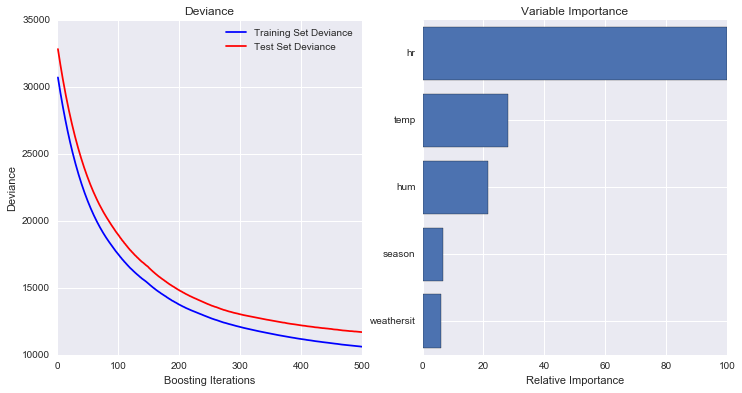

In [5]:
from utils import plot_deviance_and_importance

plot_deviance_and_importance(est, X_test, y_test, 'data/results/RentalPredictionsByHour-DevianceImportance.png')

# Cross Validation

In [6]:
scores = cross_val_score(est, df_hour[features], df_hour.cnt, cv=10, scoring='mean_absolute_error')
scores = pd.Series(scores * -1, name='RentalPredictionsByHour')
print('CV of Mean Absolute Errors:\n', scores.describe(), sep='')
scores.to_csv('data/results/RentalPredictionsByHour-CV.csv')

CV of Mean Absolute Errors:
count     10.000000
mean      83.164166
std       12.819342
min       67.916556
25%       73.368066
50%       81.068206
75%       91.922432
max      108.370040
Name: RentalPredictionsByHour, dtype: float64
